In [86]:
# importing the required Libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [87]:
# additional customization

%matplotlib inline
plt.rcParams["figure.figsize"] = (15,12)
pd.set_option('display.max_columns', 50)



# Lab1 - Cleaning Numerical Data

In [88]:
# importing the data 
marketing = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")
marketing.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# Cleaning

In [89]:
# cleaning 

columns = marketing.columns
new_columns = []

for item in columns:
    col = item.replace(' ', '_').lower()
    new_columns.append(col)
    
    
marketing.columns = new_columns
marketing.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [90]:
# re-formating date
marketing['effective_to_date'] = pd.to_datetime(marketing['effective_to_date'])
marketing.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [91]:
# dataframe for numeric data
numeric = marketing.select_dtypes(['int','float'])

In [92]:
#if unique values less than equal to 100 then I will put as discrete

numeric.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [93]:
# segregating numeric data between numerical and continous numerical
discrete = numeric[['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']]
continuous = numeric[['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount' ]]

In [94]:
# Segregating continous/discrete variables

def continuous_or_discrete(data):
    numeric = marketing.select_dtypes(['int','float'])
    discrete = numeric[['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']]
    continuous = numeric[['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount' ]]
    return discrete, continuous

discrete_data, continuous_data = continuous_or_discrete(marketing)

discrete_data.head()


,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1


# Checking outliers and  existence of Multicollinearity among explanatory variables

<AxesSubplot:>

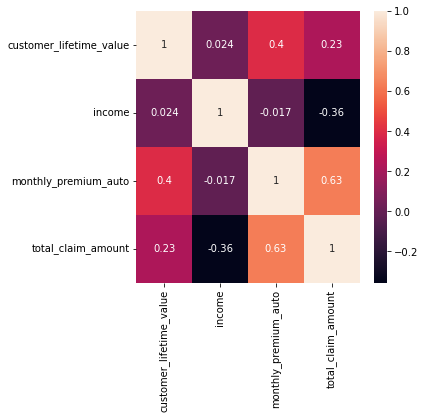

In [95]:
# Part1 (continuous variables)

# monthly_premium_auto,customer_lifetime_value have positive correlation with total claim amount
# Income has negative correlation with total claim amount


plt.rcParams["figure.figsize"] = (5,5)
correlation1 = continuous_data.corr()
sns.heatmap(correlation1, annot=True)


<AxesSubplot:>

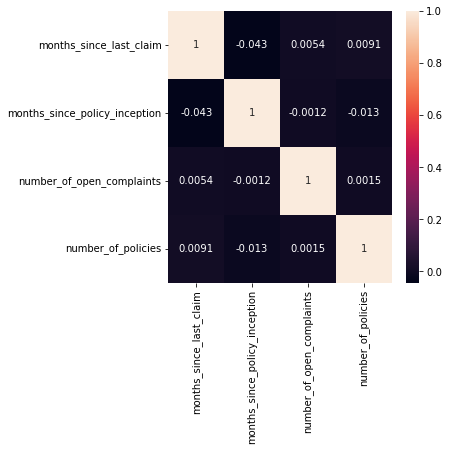

In [96]:
# Part2 (discrete variables)
# No strong correlation between each other

correlation2 = discrete_data.corr()
sns.heatmap(correlation2, annot=True)


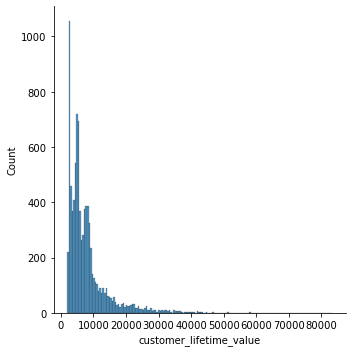

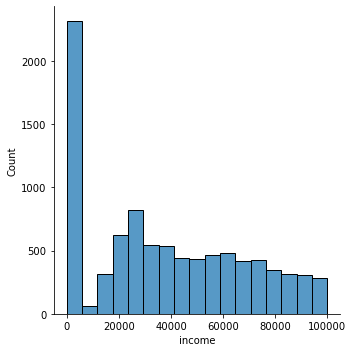

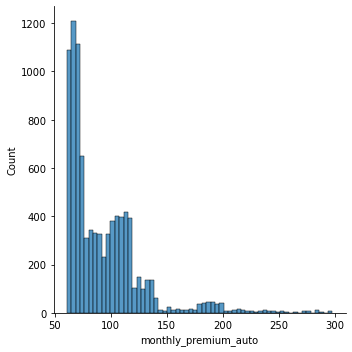

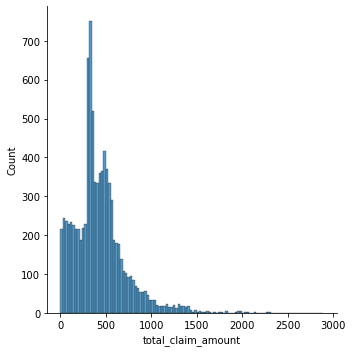

In [97]:
# plotting numerical variables

plt.rcParams["figure.figsize"] = (5,3)
def continuous_plot():
    for col in continuous_data:
        sns.displot(continuous_data, x= col)
        

continuous_plot()
        

distribution of months_since_last_claim


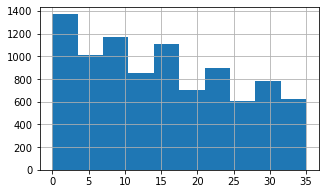

distribution of months_since_policy_inception


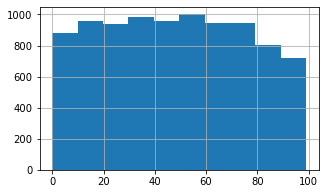

distribution of number_of_open_complaints


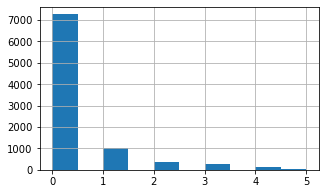

distribution of number_of_policies


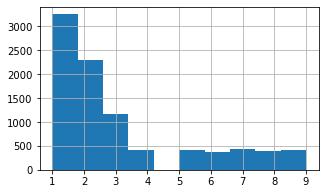

In [98]:
#Function for discrete   ???

def discrete_plot():
    for col in discrete_data:
        print(f'distribution of {col}')
        discrete_data[col].hist()
        plt.show()
        
        
discrete_plot()

In [99]:
# NOTES:

#Continuous - skewed data
#Discrete - no of open complaints normal distribution

In [100]:
# Analysing  boxplot

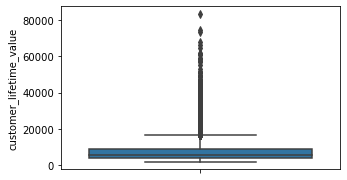

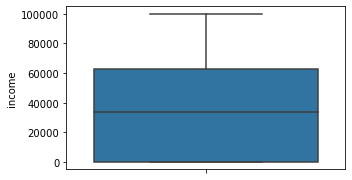

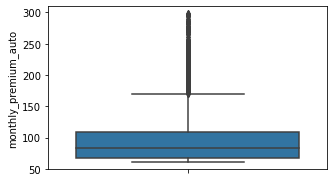

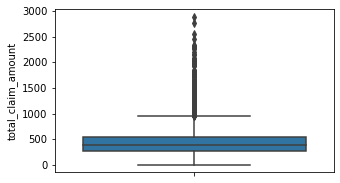

In [101]:
def continuous_boxplot():
    for col in continuous_data:
        sns.boxplot(y=continuous_data[col])
        plt.show()
        
continuous_boxplot()
        

In [102]:
# Notes:Outliers in customer_lifetime_value and total_claim amount


# Lab 2 - Cleaning Categorical Data

In [103]:
# 2 - Find all of the categorical data. Save it in a categorical_df variable.


categorical = marketing.select_dtypes(object)

categorical.head()


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [104]:
# 3 - Check for NaN values, dtypes and  Alpha-numeric

In [105]:
categorical.isnull().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [106]:
categorical.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [107]:
#Customer doesnt make sense as category - I will drop it   ???

In [108]:
#categorical = categorical.drop(columns='customer')
#categorical.head()

In [109]:
#Alpha-numeric - Policy, renew_offer_type. No need to clean it, as will have no impact in the model
#The dataset looks clean

In [110]:
# Check all unique values of columns.

In [111]:
categorical['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [112]:
categorical['renew_offer_type'].value_counts()


Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

In [113]:
#Checking value counts
for col in categorical:
    print(f'values for {col}')
    print(categorical[col].value_counts())
    print(' ')

values for customer
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64
 
values for state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
 
values for response
No     7826
Yes    1308
Name: response, dtype: int64
 
values for coverage
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
 
values for education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
 
values for employmentstatus
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64
 
values for gender
F    4658
M    4476
Name: gender, dtype: int64
 
values for location_code
Suburban

In [114]:
categorical.nunique()

customer            9134
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

In [115]:
categorical.renew_offer_type .value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

In [116]:
categorical.sales_channel.value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

In [117]:
# 8 - Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

#  values for policy is more important as it already contains information on policy_type